In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn

  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/72/b2/02770e60c4e2f7e158d923ab0dea4e9f146a2dbf267fec6d8dc61d475689/numpy-1.25.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.5 MB 1.3 MB/s eta 0:00:13
   ---------------------------------------- 0.0/15.5 MB 653.6 kB/s eta 0:00:24
   ---------------------------------------- 0.1/15.5 MB 573.4 kB/s eta 0:00:27
   ---------------------------------------- 0.1/15.5 MB 654.9 kB/s eta 0:00:24
   ---------------------------------------- 0.2/15.5 MB 748.1 kB/s eta 0:00:21
    --------------------------------------- 0.2/15.5 MB 827.9 kB/s eta 0:00:19
    --------------------------------------- 0.2/15.5 MB 765.3 kB/s eta 0:00:21
    ------------------------------

In [9]:
import pandas as pd
import numpy as np
music = pd.read_csv('music_clean.csv')


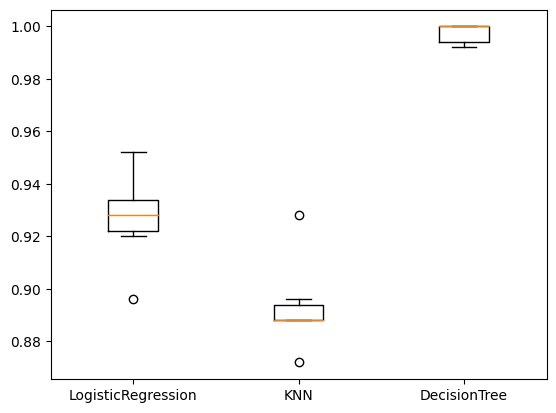

LogisticRegression Test Set Accuracy: 0.92
KNN Test Set Accuracy: 0.94
DecisionTree Test Set Accuracy: 1.0


In [19]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
X = music.drop('genre',axis=1).values
y = music['genre'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 12)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
models = {'LogisticRegression':LogisticRegression(),'KNN':KNeighborsClassifier(),'DecisionTree':DecisionTreeClassifier()}
results = []
for model in models.values():
    kf = KFold(n_splits = 6, random_state = 12 ,shuffle = True)
    cv_results = cross_val_score(model,X_train_scaled,y_train,cv=kf)
    results.append(cv_results)
plt.boxplot(results,labels=models.keys())
plt.show()
for name, model in models.items():
    model.fit(X_train_scaled,y_train)
    test_score = model.score(X_test_scaled,y_test)
    print('{} Test Set Accuracy: {}'.format(name,test_score))